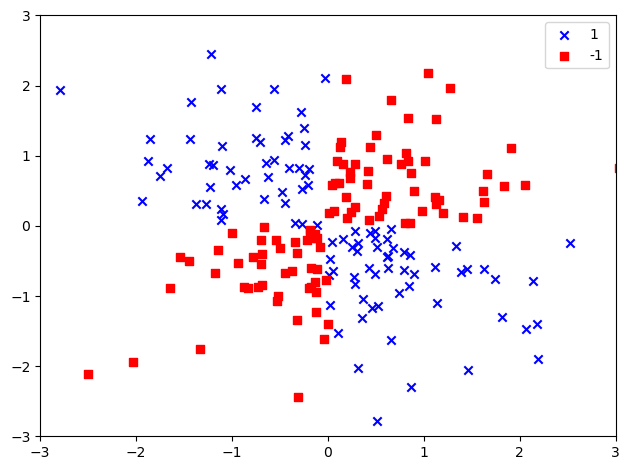

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x_xor=np.random.randn(200,2)
y_xor=np.logical_xor(x_xor[:,0]>0,
                    x_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
plt.scatter(x_xor[y_xor==1,0],
           x_xor[y_xor==1,1],
           c="b",marker="x",
           label="1")
plt.scatter(x_xor[y_xor==-1,0],
           x_xor[y_xor==-1,1],
           c="r",marker="s",
           label="-1")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Come si può notare non è possibile separare linearmente le due classi,
metodi_kernel=consoste nel creare combinazioni delle caratteristiche non lineari originali, per
              proiettarle su uno spazio a maggiore dimensionalità tramite una funzione di mappatura.


In [4]:
from sklearn.svm import SVC

svm=SVC(kernel="rbf",C=10.0,random_state=1,gamma=0.10)

svm.fit(x_xor,y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

C:\Users\ssanti\AppData\Local\Temp\ipykernel_20876\357704488.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


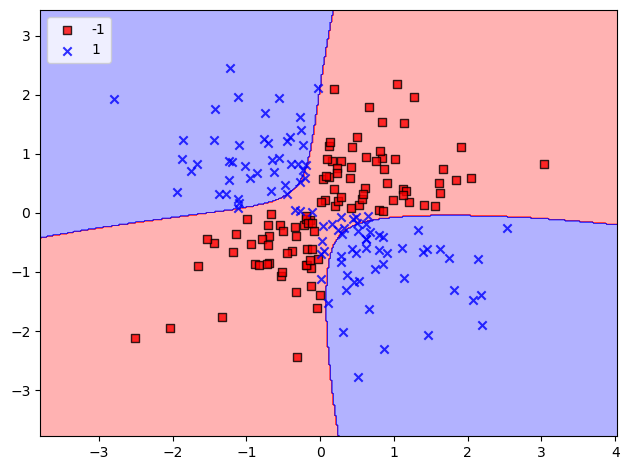

In [6]:
#visualizziamo i risultati
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
#plottiamo tutti gli esempi
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx] #sto definendo i miei dataset di training e test
        #creo dataframe,in x_test ho due colonne che ho separato X_test_0 X_test_1
        #la mia terza colonna è la y_test
        df = pd.DataFrame(dict(X_test_0=X_test[:,0],X_test_1=X_test[:,1], y_test=y_test))
        #creo un dizionario di colori
        colori = {0:'red', 2:'green', 1:'blue'}
        
        
        plt.scatter(df["X_test_0"],df["X_test_1"],
                    c=df["y_test"].map(colori),edgecolor="black",alpha=1.0,
                    linewidth=1,marker="o",
                    s=100,label="test set")
    
# x_combinated_std=np.vstack((x_train_std,x_test_std))
# y_combined=np.hstack((y_train,y_test))

plot_decision_regions(x_xor,y_xor,classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()